In [131]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from matplotlib.ticker import MaxNLocator
import numpy as np
from log import *
import warnings
import os
warnings.filterwarnings("ignore")

In [132]:
save_path = 'figure/'

RNN vs. BaggingRNN

Best iteration losses

15


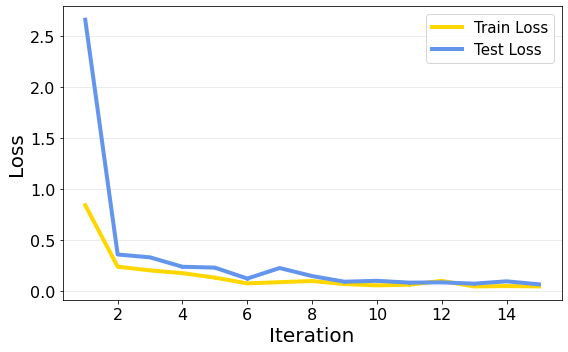

In [153]:
losses = load_loss('rnn_results/pickles/rnn_24_.pkl')

color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb40', '#2ca02c',
                    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

train_losses = losses[0][::17]
test_losses = losses[1][::17]

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

ax.plot(np.arange(1, len(train_losses)+1), train_losses, '-o', color="gold", linewidth=4,markersize=2, label='Train Loss')

ax.plot(np.arange(1, len(test_losses)+1), test_losses, '-o', color="cornflowerblue", linewidth=4,markersize=2, label='Test Loss')
print(len(test_losses))
ax.grid(alpha=.3, axis="y")

ax.set_ylabel('Loss', fontsize=20)
ax.set_xlabel('Iteration', fontsize=20)

plt.rc('ytick',labelsize=16)
plt.rc('xtick',labelsize=16)
plt.legend(fontsize=15)
plt.tight_layout()
plt.axis('tight')

plt.savefig(save_path+'rnn_loss_curves.pdf', dpi=1000, bbox_inches='tight')
plt.show()

15


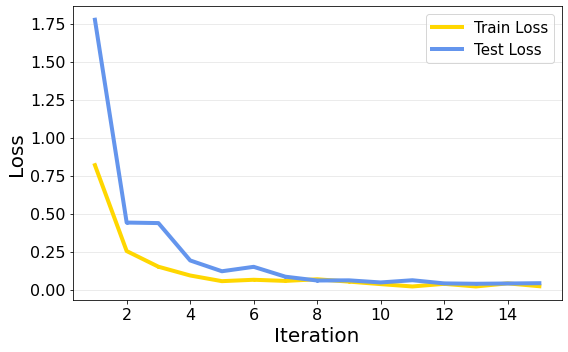

In [152]:
losses = load_loss('b_rnn_results/pickles/K_4_b_rnn.pkl')

color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb40', '#2ca02c',
                    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']

train_losses = losses[0][::17]
test_losses = losses[1][::17]

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

ax.plot(np.arange(1, len(train_losses)+1), train_losses, '-o', color="gold", linewidth=4,markersize=2, label='Train Loss')

ax.plot(np.arange(1, len(test_losses)+1), test_losses, '-o', color="cornflowerblue", linewidth=4,markersize=2, label='Test Loss')
print(len(test_losses))
ax.grid(alpha=.3, axis="y")

ax.set_ylabel('Loss', fontsize=20)
ax.set_xlabel('Iteration', fontsize=20)

plt.rc('ytick',labelsize=16)
plt.rc('xtick',labelsize=16)
plt.legend(fontsize=15)
plt.tight_layout()
plt.axis('tight')

plt.savefig(save_path+'b_rnn_loss_curves.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Plot time series prediction results

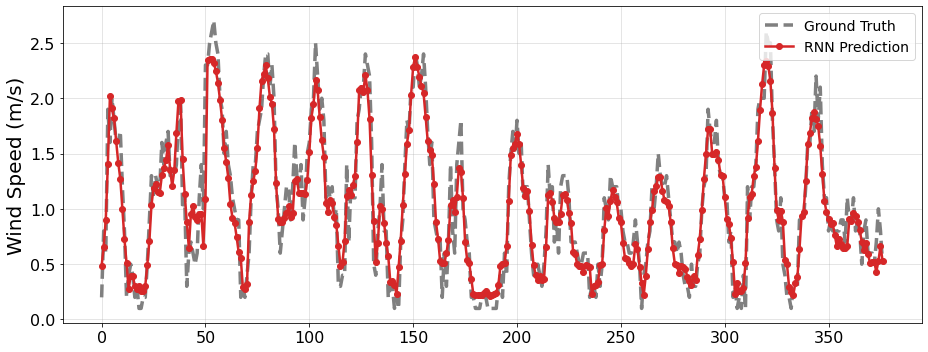

In [135]:
prediction, y = load_prediction_result('rnn_results/net/rnn_24_.pt')

segment_pred = prediction.data.numpy()[500:]
segment_y = y[500:]

color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb40', '#2ca02c',
                    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(111)
ax.plot(np.arange(0, len(segment_y)), segment_y, '--',label="Ground Truth", color='gray', linewidth=3.5,markersize=4)
ax.plot(np.arange(0, len(segment_pred)), segment_pred, '-o',label="RNN Prediction", color=color_sequence[6], linewidth=2.5,markersize=6)
ax.legend(fontsize =14)
ax.grid(alpha=.4)

ax.set_ylabel('Wind Speed (m/s)',fontsize=20)
# ax.set_xlabel('Date',fontsize=15)
plt.rc('ytick',labelsize=19)

# plt.ylim(0, 165)     #也可写成plt.ylim(-2, 2)
plt.tight_layout()

from sklearn.metrics import mean_squared_error
mean_squared_error(prediction.data.numpy(),y)

plt.savefig(save_path+'rnn_prediction.pdf', dpi=1000, bbox_inches='tight')
plt.show()

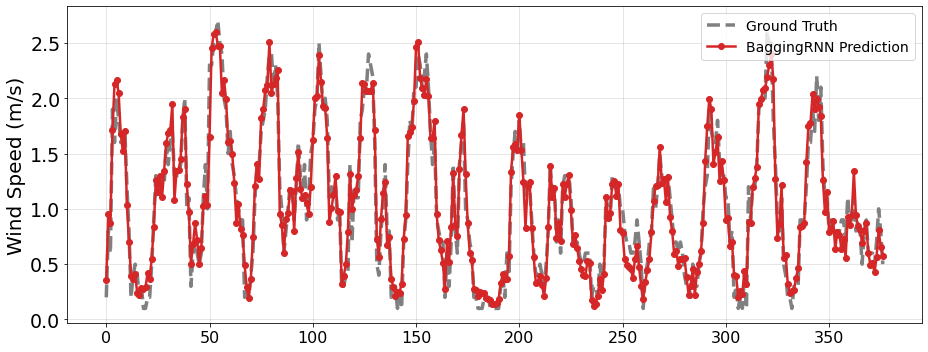

In [136]:
prediction, y = load_prediction_result('b_rnn_results/net/K_4_b_rnn_.pt')
segment_pred = prediction.data.numpy()[500:]
segment_y = y[500:]

color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb40', '#2ca02c',
                    '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                    '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                    '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(111)
ax.plot(np.arange(0, len(segment_y)), segment_y, '--',label="Ground Truth", color='gray', linewidth=3.5,markersize=4)
ax.plot(np.arange(0, len(segment_pred)), segment_pred, '-o',label="BaggingRNN Prediction", color=color_sequence[6], linewidth=2.5,markersize=6)
ax.legend(fontsize =14)
ax.grid(alpha=.4)

ax.set_ylabel('Wind Speed (m/s)',fontsize=20)
# ax.set_xlabel('Date',fontsize=15)
plt.rc('ytick',labelsize=19)

# plt.ylim(0, 165)     #也可写成plt.ylim(-2, 2)

plt.tight_layout()
# from sklearn.metrics import mean_squared_error
# mean_squared_error(prediction.data.numpy(),y)

plt.savefig(save_path+'b_rnn_prediction.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Test Loss Boxplot

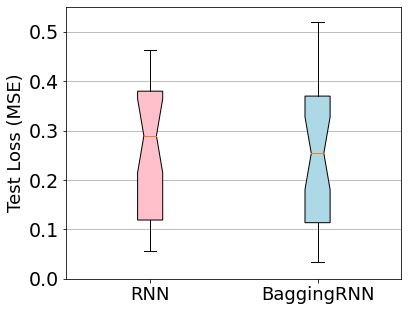

In [137]:
b_rnn_df = pd.read_csv (r'b_rnn_results/K_4_bagging_rnn_log_24.csv')
rnn_df = pd.read_csv (r'rnn_results/rnn_log_24.csv')

rnn_test_loss = rnn_df['test_loss']
b_rnn_test_loss = b_rnn_df['test_loss']
fig = plt.figure(figsize=(6, 5))  
ax = plt.subplot()  

bplot = ax.boxplot([rnn_test_loss, b_rnn_test_loss], patch_artist=True, notch=True)

ax.set_xticks([1, 2])
ax.set_xticklabels(['RNN', 'BaggingRNN'],fontsize=18)
ax.set_ylabel('Test Loss (MSE)',fontsize=18)

colors = ['pink', 'lightblue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)  
plt.rc('ytick',labelsize=15)

plt.grid(axis='y')
plt.ylim(0, 0.55)

plt.savefig(save_path+'models_test_losses_boxplot.pdf', dpi=1000, bbox_inches='tight')
plt.show()

Complexisty Analysis

In [138]:
b_rnn_df_ks = []
directory = os.walk('b_rnn_results')  
for path, _, file_list in directory:  
    for file_name in file_list:
        if path == 'b_rnn_results':
            file_path = os.path.join(path, file_name)
            b_rnn_df_k = pd.read_csv (file_path)
            b_rnn_df_ks.append(b_rnn_df_k)

b_rnn_best_loss = []
b_rnn_best_r2 = []
b_rnn_best_rmse = []
b_rnn_best_mae = []

b_rnn_train_loss = []
b_rnn_loss = []
b_rnn_r2 = []
b_rnn_rmse = []
b_rnn_mae = []

for b_rnn_df_k in b_rnn_df_ks:
    b_rnn_best_loss.append(b_rnn_df_k['test_loss'].min())
    b_rnn_best_r2.append(b_rnn_df_k['r2'].max())
    b_rnn_best_rmse.append(b_rnn_df_k['rmse'].min())
    b_rnn_best_mae.append(b_rnn_df_k['mae'].min())

    b_rnn_train_loss.append(b_rnn_df_k['train_loss'])
    b_rnn_loss.append(b_rnn_df_k['test_loss'])
    b_rnn_r2.append(b_rnn_df_k['r2'])
    b_rnn_rmse.append(b_rnn_df_k['rmse'])
    b_rnn_mae.append(b_rnn_df_k['mae'])


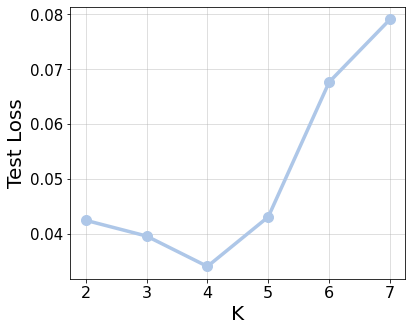

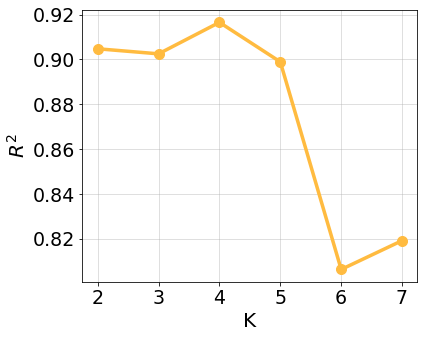

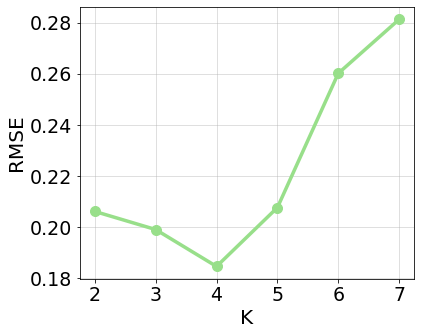

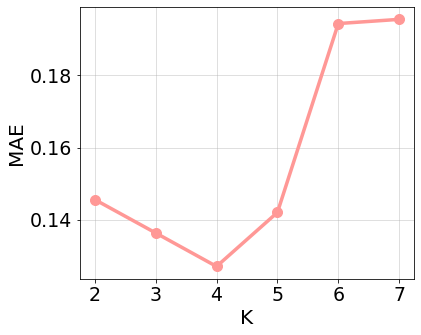

In [139]:
scores = [b_rnn_best_loss, b_rnn_best_r2, b_rnn_best_rmse, b_rnn_best_mae]
name = ['Test Loss', '$R^2$', 'RMSE', 'MAE']
fime_name = ['test_loss', 'r2', 'rmse', 'mae']
c=1
for i in range(len(scores)):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)

    ax.plot(np.arange(2, len(scores[i])+2), scores[i], '-o',label="Ground Truth", color=color_sequence[c], linewidth=3.5,markersize=10)
    ax.grid(alpha=.5)
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylabel(name[i],fontsize=20)
    ax.set_xlabel('K',fontsize=20)
    plt.rc('ytick',labelsize=19)
    plt.rc('xtick',labelsize=19)
    # plt.show()
    plt.savefig(save_path+'complexity_'+ fime_name[i] +'.pdf', dpi=1000, bbox_inches='tight')
    plt.show()
    c+=2


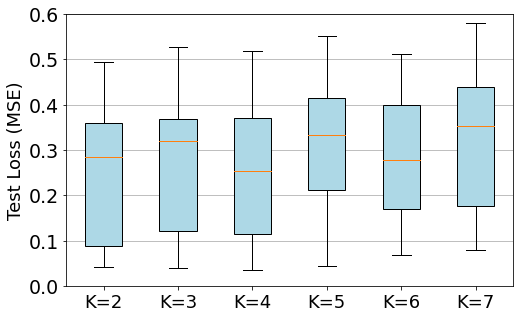

In [140]:
fig = plt.figure(figsize=(8, 5))  
ax = plt.subplot()  

bplot = ax.boxplot(b_rnn_loss, patch_artist=True, notch=False)

ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xticklabels(['K=2', 'K=3', 'K=4', 'K=5', 'K=6', 'K=7' ],fontsize=18)
ax.set_ylabel('Test Loss (MSE)',fontsize=18)

colors = ['lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue', 'lightblue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)  
plt.rc('ytick',labelsize=15)
plt.ylim(0, 0.6) 
plt.grid(axis='y')

plt.savefig(save_path+'complexity_test_losses_boxplot.pdf', dpi=1000, bbox_inches='tight')
plt.show()

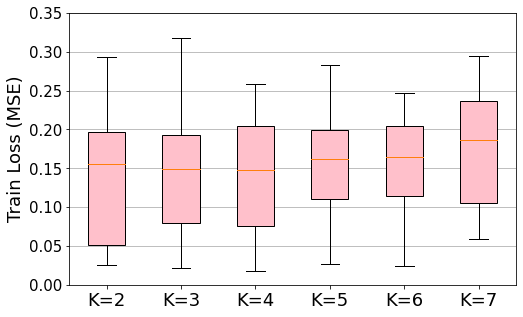

In [141]:
fig = plt.figure(figsize=(8, 5))  
ax = plt.subplot()  

bplot = ax.boxplot(b_rnn_train_loss, patch_artist=True, notch=False)

ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xticklabels(['K=2', 'K=3', 'K=4', 'K=5', 'K=6', 'K=7' ],fontsize=18)
ax.set_ylabel('Train Loss (MSE)',fontsize=18)

colors = ['pink', 'pink', 'pink', 'pink', 'pink', 'pink']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)  
plt.rc('ytick',labelsize=15)
plt.ylim(0, 0.35) 
plt.grid(axis='y')

plt.savefig(save_path+'complexity_train_losses_boxplot.pdf', dpi=1000, bbox_inches='tight')
plt.show()